In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
from math import floor

In [3]:
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 144
plt.rcParams['axes.unicode_minus'] = False

In [4]:
edge_v = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
                    
edge_h = np.array([[1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]])
 
edge_multi = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]])

identity = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

blur_3 = np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]]) / 16

In [5]:
def make_kernel(klist):
    k_l = np.array([])
    for k in klist:
        newk = np.array([k]*3)
        k_l = np.append(k_l, newk).reshape(-1, *newk.shape)
    return k_l

In [6]:
kernel_list = make_kernel([edge_v, edge_h, edge_multi])

In [7]:
kernel_list.shape

(3, 3, 3, 3)

In [8]:
img = Image.open("pic_1.jpg")
img_data = np.array(img).transpose((2, 0, 1))

In [9]:
def pad(data, width=1):
    m, n, r = data.shape
    res = np.zeros((m, n + 2 * width, r + 2 * width), 
                   dtype=data.dtype)
    res[:, width:-width, width:-width] = data
    return res

In [10]:
def show_img(_data, cmap="gray"):
    # data = np.transpose(_data, (1, 2, 0))
    data = _data.sum(axis=0)
    return plt.imshow(data, cmap=cmap)

In [11]:
def get_piece(img, x, y, l):
    return img[:, x:x+l, y:y+l]

In [12]:
def conv(_data, kernel_list, padding=0, stride=1):
    print("conv with kernel size:{}\n\tpadding={}\n\tstride={}"
          .format(kernel_list.shape, padding, stride))
    print("Image size: {}".format(_data.shape))
    n_c, n_w, n_h = _data.shape
    assert kernel_list.shape[2] == kernel_list.shape[3]  # Square kernel is a must
    kernel_size = kernel_list.shape[2]
    assert n_c == kernel_list.shape[1] # #channels == #kernel_channels
    res_shape = kernel_list.shape[0], \
                floor((n_w + 2 * padding - kernel_size) / stride) + 1, \
                floor((n_h + 2 * padding - kernel_size) / stride) + 1
    res = np.zeros(res_shape)
    print("res shape:", res_shape)
    # return res
    if padding > 0:
        data = pad(_data, padding)
    else:
        data = _data.copy()
    dshape = data.shape # n_c, n_w, n_h  
    rx = 0
    ry = 0
    print("conv...")
    for k in range(kernel_list.shape[0]):
        rx = 0
        for x in np.arange(0, dshape[1] - kernel_size + 1, stride):
            ry = 0
            for y in np.arange(0, dshape[2] - kernel_size + 1, stride):
                # print(y)
                res[k, rx, ry] += np.dot(get_piece(data, x, y, kernel_size).flatten(),
                                          kernel_list[k].flatten())
                # print(k, rx, ry)
                ry += 1
            rx += 1
    print("conv complete!")
    return res

In [13]:
def pool(_data, size=2, stride=2, padding=0, mode="max"):
    print("Pooling with:\n\tsize = {}\n\tstride = {}\n\tpadding = {}\n\tmode={}"
          .format(size, stride, padding, mode))
    n_c, n_w, n_h = _data.shape
    res_shape = n_c, \
                floor((n_w + 2 * padding - size) / stride) + 1, \
                floor((n_h + 2 * padding - size) / stride) + 1
    res = np.zeros(res_shape)
    print("res shape:", res_shape)
    if padding > 0:
        data = pad(_data, padding)
    else:
        data = _data.copy()
    dshape = data.shape
    rx = 0
    ry = 0
    for x in np.arange(0, dshape[1] - size + 1, stride):
        ry = 0
        for y in np.arange(0, dshape[2] - size + 1, stride):
            # print(y)
            res[:, rx, ry] = data[:, x:x+size, y:y+size].max(axis=1).max(axis=1)
            ry += 1
        rx += 1
    return res

conv with kernel size:(3, 3, 3, 3)
	padding=1
	stride=1
Image size: (3, 640, 640)
res shape: (3, 640, 640)
conv...
conv complete!


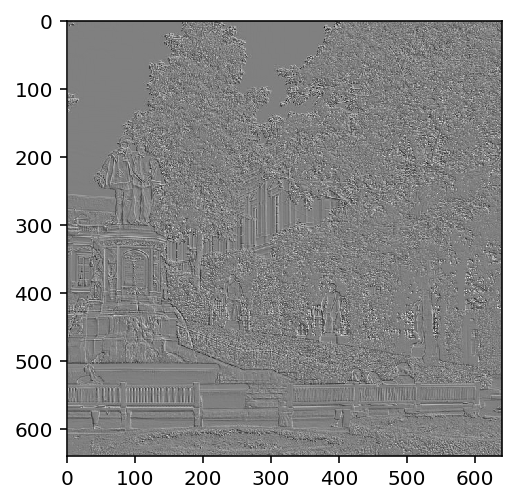

Pooling with:
	size = 2
	stride = 2
	padding = 0
	mode=max
res shape: (3, 320, 320)


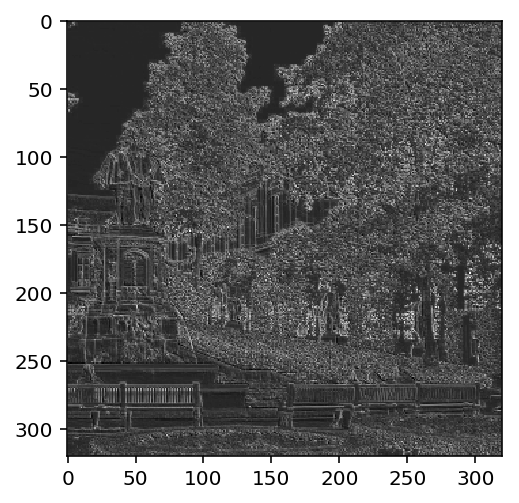

In [14]:
res = conv(img_data, kernel_list, padding=1, stride=1)
show_img(res, "gray")
plt.show()
res = pool(res)
show_img(res)
plt.show()